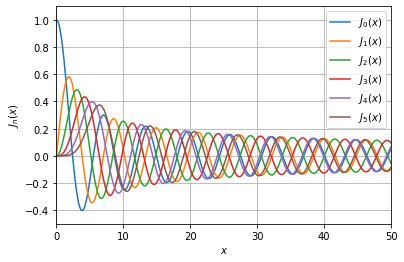

In [1]:
#Bessel's functions

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import cmath
import math

x = np.linspace(0, 50, 500)
for v in range(0, 6):
    plt.plot(x, sp.jv(v, x))
    
plt.xlim((0, 50))
plt.ylim((-0.5, 1.1))
plt.legend(('${J}_0(x)$', '${J}_1(x)$', '${J}_2(x)$','${J}_3(x)$', '${J}_4(x)$', '${J}_5(x)$'), loc = 0)
plt.xlabel('$x$')
plt.ylabel('${J}_n(x)$')
plt.grid(True)


plt.show()

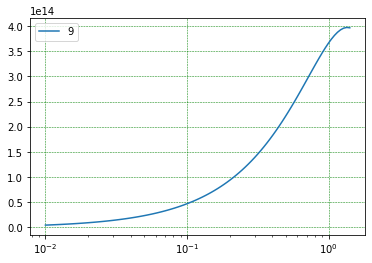

In [47]:
# X variable (tricky one)

hbar= (6.626e-34)/(2*np.pi)
B = 1.0

#Drumhead device
g_0 = 210*(2*np.pi) #Hz
Kappa_ex = (250000)*(2*np.pi) #Hz
Kappa_tot = (500000)*(2*np.pi) #Hz
Kappa_in = Kappa_tot - Kappa_ex

#Cavity
Gamma_m = 2*np.pi*420
omega_m = (15.121e6)*(2*np.pi)
omega_c = (5.156e9)*(2*np.pi)
omega = omega_m #For solving the limit cycle equation
delta = 0 #pump detuning
Delta = omega + delta

P_in =25e-9 #W

x = np.logspace(-2, 0.15, num = 100)


#X calculus youpitralala
A = complex(0,Kappa_ex * P_in**2 * g_0/B)
N = 10
frac_list = []

for n in range(N):
    frac_list.append((sp.jv(n, x) * sp.jv(n+1, x))/((complex(Kappa_tot/2, (n*omega-Delta)))*(complex(Kappa_tot/2,-((n+1)*omega-Delta)))))
  
X =  complex(0,1)*(Kappa_ex*(P_in * omega_m)/(2*hbar*omega * B**2) * sum(frac_list))
Gamma_opt = -2* X.real

fig, ax = plt.subplots()

ax.plot(x, Gamma_opt/Gamma_m +1, label = n)

ax.legend()
ax.set_xscale('log')
ax.tick_params(axis='x', which='minor', bottom=True)
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5)


